Some useful article to read
https://www.mdpi.com/1424-8220/19/22/4933/htm

https://en.wikipedia.org/wiki/Convolutional_neural_network

**Overview of project and dataset:** <br>
- Customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.
- Santander Bank is asking machine learners to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.
- In this project, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.
- You are provided with an anonymized dataset containing a large number of numeric variables. The "TARGET" column is the variable to predict. It equals 1-unsatisfied customers and 0-satisfied customers.
- The task is to predict the probability that each customer in the test set is an unsatisfied customer.

File descriptions(https://www.kaggle.com/c/santander-customer-satisfaction)
 - Santander Customer Satisfaction_train.csv - the training set including the target
 - Santander Customer Satisfaction_test.csv - the test set without the target
 - sample_submission.csv - a sample submission file in the correct format



**What is CNN?** <br>
 - In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. 
 - CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting data. Typical ways of regularization include adding some form of magnitude measurement of weights to the loss function. CNNs take a different approach towards regularization: they take advantage of the hierarchical pattern in data and assemble more complex patterns using smaller and simpler patterns. Therefore, on the scale of connectedness and complexity, CNNs are on the lower extreme.
 - Convolutional networks were inspired by biological processes in that the connectivity pattern between neurons resembles the organization of the animal visual cortex. Individual cortical neurons respond to stimuli only in a restricted region of the visual field known as the receptive field. The receptive fields of different neurons partially overlap such that they cover the entire visual field.
 - CNNs use relatively little pre-processing compared to other image classification algorithms. This means that the network learns the filters that in traditional algorithms were hand-engineered. This independence from prior knowledge and human effort in feature design is a major advantage.<br>

- Applications 
 1. Image and video recognition 
 2. Recommender systems, image classification
 3. Medical image analysis, 
 4. Natural language processing 
 5. Financial time series.

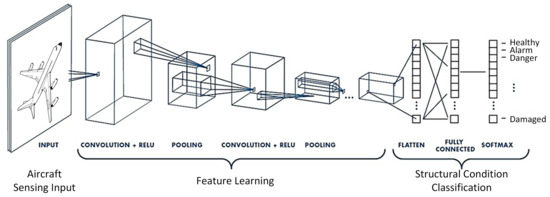

#### Project building process:
 1. Importing Tensorflow, Sequential(linear stacking of layers), CNN layers, adam optimizers(gradient-based optimization algorithms) numpy, pandas,seaborn,matplotlib,train_test_split, Standard scaler, Variancethreshold

 2. Data preprocessing 
 - Data cleaning- Removing unwanted(like ID)and contant quasi constant and duplicate features before passing into the model 
 - Data processing - to fitting required data to the model(i.e. Scaling, reshaping, to numpy)

 3. Building CNN model with various layers and compiling with adam optimizer.

 4. Model Training fitting the data into the model and checking out model accuracy and learning curve

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [49]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.0.0


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [8]:
data = pd.read_csv('Santander Customer Satisfaction_train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [9]:
data.shape

(76020, 371)

In [14]:
X = data.drop(labels= ['ID', 'TARGET'], axis = 1) ##feature variables
X.shape

(76020, 369)

In [15]:
y = data['TARGET']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)

In [17]:
X_train.shape, X_test.shape

((60816, 369), (15204, 369))

### Remove a constant, quasi constant, duplicate Features

In [18]:
filter = VarianceThreshold(0.01)
X_train = filter.fit_transform(X_train)
X_test = filter.transform(X_test)

X_train.shape, X_test.shape

((60816, 273), (15204, 273))

In [19]:
389-273 #removed features

116

In [20]:
X_train_T = X_train.T
X_test_T = X_test.T

In [21]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [22]:
X_train_T.shape

(273, 60816)

In [23]:
X_train_T.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [24]:
X_train_T.duplicated().sum()

17

In [25]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [38]:
features_to_keep = [not index for index in duplicated_features]
features_to_keep[35:45]

[True, True, True, False, True, False, True, True, True, False]

In [27]:
X_train = X_train_T[features_to_keep].T
X_train.shape

(60816, 256)

In [28]:
X_test = X_test_T[features_to_keep].T
X_test.shape

(15204, 256)

In [30]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train

array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
       ...,
       [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
       [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]])

finally in a same range

In [41]:
X_train.shape, X_test.shape

((60816, 256), (15204, 256))

In [42]:
X_train = X_train.reshape(60816, 256, 1)  #Neural network needs 3d data
X_test = X_test.reshape(15204, 256, 1) 

In [43]:
X_train.shape, X_test.shape

((60816, 256, 1), (15204, 256, 1))

In [46]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

now data is ready to pass to neural network

### Building CNN 

In [47]:
model = Sequential()
model.add(Conv1D(32,3, activation='relu', input_shape= (256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64,3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128,3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

#flatten is to convert 2d 3d data into single dimension
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 254, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0

In [50]:
model.compile(optimizer = Adam(lr=0.00005), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [51]:
# Model Training
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test), verbose=1)

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
60816/60816 [==============================] - 133s 2ms/sample - loss: 0.2260 - accuracy: 0.9509 - val_loss: 0.1830 - val_accuracy: 0.9605
Epoch 2/10
60816/60816 [==============================] - 132s 2ms/sample - loss: 0.1780 - accuracy: 0.9590 - val_loss: 0.1787 - val_accuracy: 0.9604
Epoch 3/10
60816/60816 [==============================] - 128s 2ms/sample - loss: 0.1690 - accuracy: 0.9601 - val_loss: 0.1793 - val_accuracy: 0.9604
Epoch 4/10
60816/60816 [==============================] - 131s 2ms/sample - loss: 0.1665 - accuracy: 0.9603 - val_loss: 0.1690 - val_accuracy: 0.9601
Epoch 5/10
60816/60816 [==============================] - 128s 2ms/sample - loss: 0.1632 - accuracy: 0.9603 - val_loss: 0.1642 - val_accuracy: 0.9603
Epoch 6/10
60816/60816 [==============================] - 128s 2ms/sample - loss: 0.1610 - accuracy: 0.9604 - val_loss: 0.1668 - val_accuracy: 0.9604
Epoch 7/10
60816/60816 [==========================

In the very first step we pass the accuracy of previous old model 82 and 84. so, here we have the powerful CNN and feature selection( we removed unnecessary feature which aint giving any importance to our model and by this we have reduced the complexity of the model and chances of overfitting 

In [52]:
history.history

{'loss': [0.22596701619898182,
  0.1779903685754928,
  0.16895269309982786,
  0.16647269440262577,
  0.16324581849660505,
  0.1610322933123633,
  0.16064876634054234,
  0.15702359943256916,
  0.15564070522914558,
  0.1544940817598386],
 'accuracy': [0.9509011,
  0.9590404,
  0.9601256,
  0.9602901,
  0.9603229,
  0.96037227,
  0.9604216,
  0.96045446,
  0.9604216,
  0.9604216],
 'val_loss': [0.1830069792722282,
  0.1786837011146423,
  0.17932393741753502,
  0.16895874200687225,
  0.1642302146528903,
  0.16684062073094943,
  0.16392177924948972,
  0.16598913051389888,
  0.162309926691235,
  0.16366333475640749],
 'val_accuracy': [0.9605367,
  0.9604052,
  0.9604052,
  0.9600763,
  0.9602736,
  0.9604052,
  0.9604052,
  0.9599447,
  0.9596817,
  0.9596159]}

In [53]:
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1,epoch+1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'validation'], loc = 'upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'validation'], loc = 'upper left')
    plt.show()

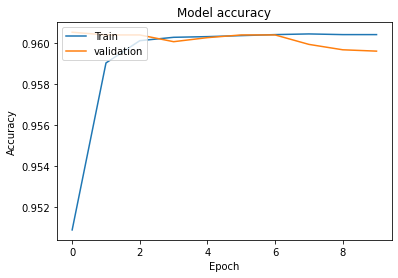

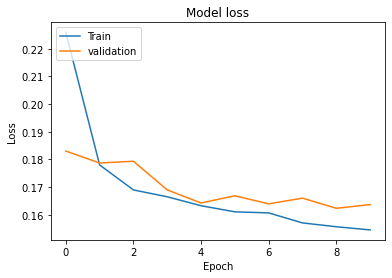

In [54]:
plot_learningCurve(history, 10)

In [56]:
#around 5 and 6 epoch where we got max accuracy